In [3]:
using Pkg

In [4]:
import Pkg
Pkg.add("Plots")
Pkg.add("Cbc")
Pkg.add("LightGraphs")

    Updating registry at `C:\Users\sabri\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\sabri\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\sabri\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\sabri\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\sabri\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\sabri\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\sabri\.julia\environments\v1.6\Manifest.toml`


In [5]:
using Plots, JuMP, Cbc, LightGraphs

In [ ]:
using LinearAlgebra, Random
Random.seed!(0)

n = 10
P = rand(n, 2)
c = [
    norm(P[i,:] - P[j,:]) for i= 1:n, j = 1:n
]
scatter(P[:,1], P[:,2], c=:blue, leg=false)

In [7]:
function plota_grafo(P, X)
    n = size(X, 1)
    p = scatter(P[:,1], P[:,2], c=:blue, leg=false)
    for i = 1:n, j = 1:n
        if X[i,j] == 1
            plot!(p, [P[i,1], P[j,1]], [P[i,2], P[j,2]], c=:blue, l=:arrow)
        end
    end
    p
end

plota_grafo (generic function with 1 method)

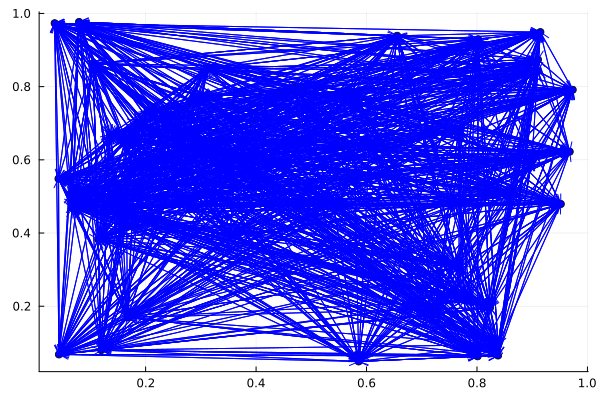

In [16]:
using LinearAlgebra
X = rand(0:1, n, n)
#X = Matrix(1.0I, n, n)
perm = randperm(n)
X = X[:,perm]
plota_grafo(P, X)

In [9]:
X = round.(Int, value.(X))

10×10 Matrix{Int64}:
 1  0  1  0  1  0  1  0  0  1
 1  1  0  0  1  0  1  0  0  1
 1  0  1  0  1  0  1  0  0  0
 0  1  1  0  1  1  1  0  0  1
 0  1  1  0  0  1  0  1  0  0
 1  1  0  1  0  0  0  1  0  0
 1  0  0  0  1  1  1  0  1  1
 0  1  0  0  0  0  0  1  0  0
 0  1  1  1  1  0  0  0  1  1
 0  0  0  1  1  0  0  0  1  1

In [10]:
using Combinatorics

model = Model(Cbc.Optimizer)
@variable(model, x[1:n, 1:n], Bin)
@objective(model, Min, sum(x[i,j] * c[i,j] for i = 1:n, j = 1:n))
@constraint(model, [i=1:n], sum(x[i,j] for j = 1:n) == 1)
@constraint(model, [j=1:n], sum(x[i,j] for i = 1:n) == 1)
for S ∈ combinations(1:n)
    lenS = length(S)
    if lenS == n
        break
    end
    @constraint(model, sum(x[i,j] for i ∈ S, j ∈ S) ≤ lenS - 1)
end
optimize!(model)

Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 2.89378 - 0.01 seconds
Cgl0002I 10 variables fixed
Cgl0004I processed model has 1032 rows, 90 columns (90 integer (90 of which binary)) and 23130 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 2.89378
Cbc0038I Before mini branch and bound, 90 integers at bound fixed and 0 continuous
Cbc0038I Mini branch and bound did not improve solution (0.06 seconds)
Cbc0038I After 0.06 seconds - Feasibility pump exiting with objective of 2.89378 - took 0.01 seconds
Cbc0012I Integer solution of 2.8937809 found by feasibility pump after 0 iterations and 0 nodes (0.06 seconds)
Cbc0001I Search completed - best objective 2.893780898449664, took 0 iterations and 0 nodes (0.06 seconds)
Cbc0035I Maximum depth 0, 0 variables fixed on reduced cost
Cuts at root node changed objective from 2.89378 to

In [11]:
using Combinatorics

Combinatorics.combinations(1:5) |> collect

31-element Vector{Vector{Int64}}:
 [1]
 [2]
 [3]
 [4]
 [5]
 [1, 2]
 [1, 3]
 [1, 4]
 [1, 5]
 [2, 3]
 [2, 4]
 [2, 5]
 [3, 4]
 ⋮
 [1, 3, 5]
 [1, 4, 5]
 [2, 3, 4]
 [2, 3, 5]
 [2, 4, 5]
 [3, 4, 5]
 [1, 2, 3, 4]
 [1, 2, 3, 5]
 [1, 2, 4, 5]
 [1, 3, 4, 5]
 [2, 3, 4, 5]
 [1, 2, 3, 4, 5]

In [12]:
X = round.(Int, value.(x))

10×10 Matrix{Int64}:
 0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0

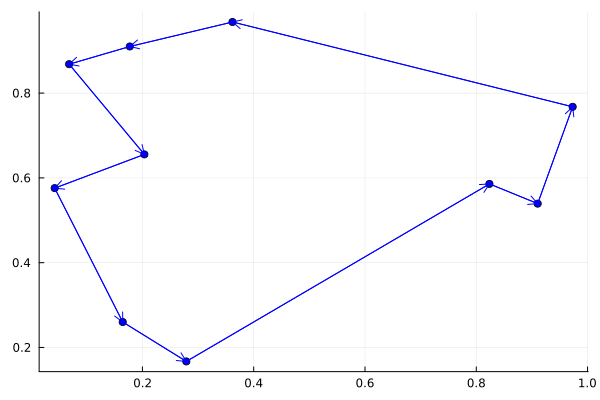

In [13]:
X = round.(Int, value.(x))
plota_grafo(P, X)

In [ ]:
using Combinatorics

model = Model(Cbc.Optimizer)
@variable(model, x[1:n, 1:n], Bin)
@objective(model, Min, sum(x[i,j] * c[i,j] for i = 1:n, j = 1:n))
@constraint(model, [i=1:n], sum(x[i,j] for j = 1:n) == 1)
@constraint(model, [j=1:n], sum(x[i,j] for i = 1:n) == 1)
@constraint(model, [i=1:n], x[i,i] == 0)

done = false
while !done
    optimize!(model)
    X = round.(Int, value.(x))
    G = SimpleDiGraph(n)
    for i = 1:n, j = 1:n
        if X[i,j] == 1
            add_edge!(G, i, j)
        end
    end
    C = connected_components(G)
    if length(C) == 1
        done = true
    else
        for S ∈ C
            lenS = length(S)
            if lenS == n
                break
            end
            @constraint(model, sum(x[i,j] for i ∈ S, j ∈ S) ≤ lenS - 1)
        end
    end
end
X = round.(Int, value.(x))
plota_grafo(P, X)            
